In [192]:
from __future__ import division
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
sns.set_style('whitegrid')
%matplotlib inline

In [195]:
from datetime import datetime
import yfinance as yf

In [196]:
#list tracking the magnificent 7 stocks
stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'META', 'TSLA', 'NVDA']

In [197]:
#starting at jan 2022 to present day
end = datetime.now()
start = datetime(end.year-2, end.month, end.day)

In [198]:
for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [199]:
#simple statistics on AAPL
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,163.692485,165.536143,162.005606,163.863459,163.020111,7.306976e+07
std,17.835629,17.527602,18.069505,17.810045,18.039813,2.527142e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,148.884995,150.930000,147.264999,149.375000,148.332054,5.402095e+07
50%,164.699997,166.350006,163.000000,165.070007,163.731705,6.882640e+07
75%,176.720001,178.455002,175.294998,177.189995,176.533295,8.592680e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.826020e+08


In [200]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2022-01-11 to 2024-01-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       503 non-null    float64
 1   High       503 non-null    float64
 2   Low        503 non-null    float64
 3   Close      503 non-null    float64
 4   Adj Close  503 non-null    float64
 5   Volume     503 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


<Axes: xlabel='Date'>

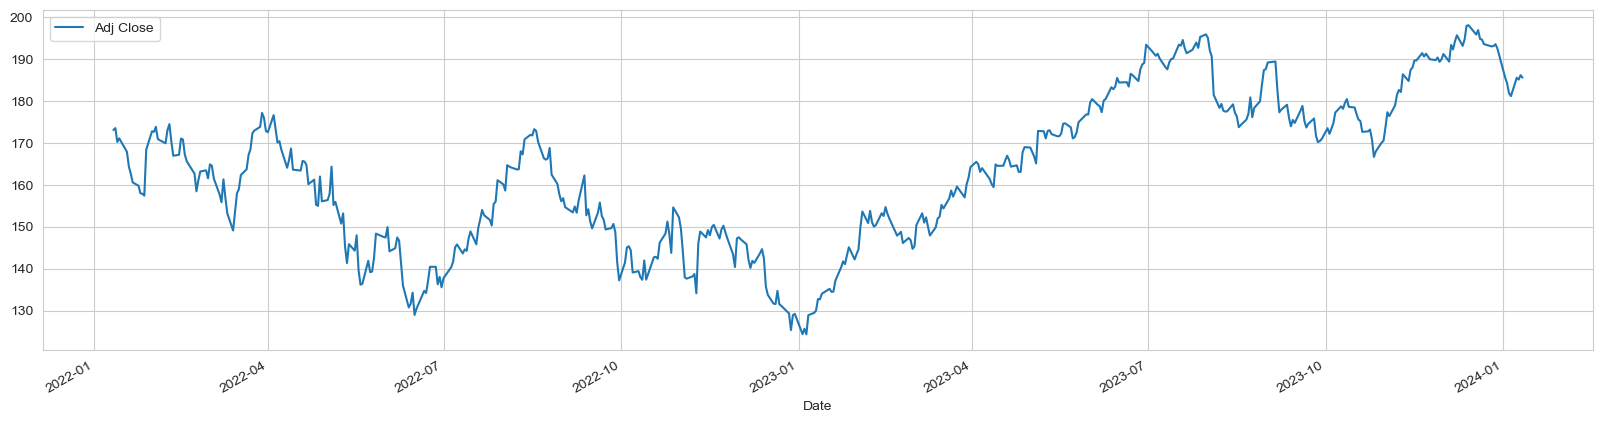

In [201]:
#AAPL adjusted close
AAPL['Adj Close'].plot(legend = True, figsize = (20,5))

<Axes: xlabel='Date'>

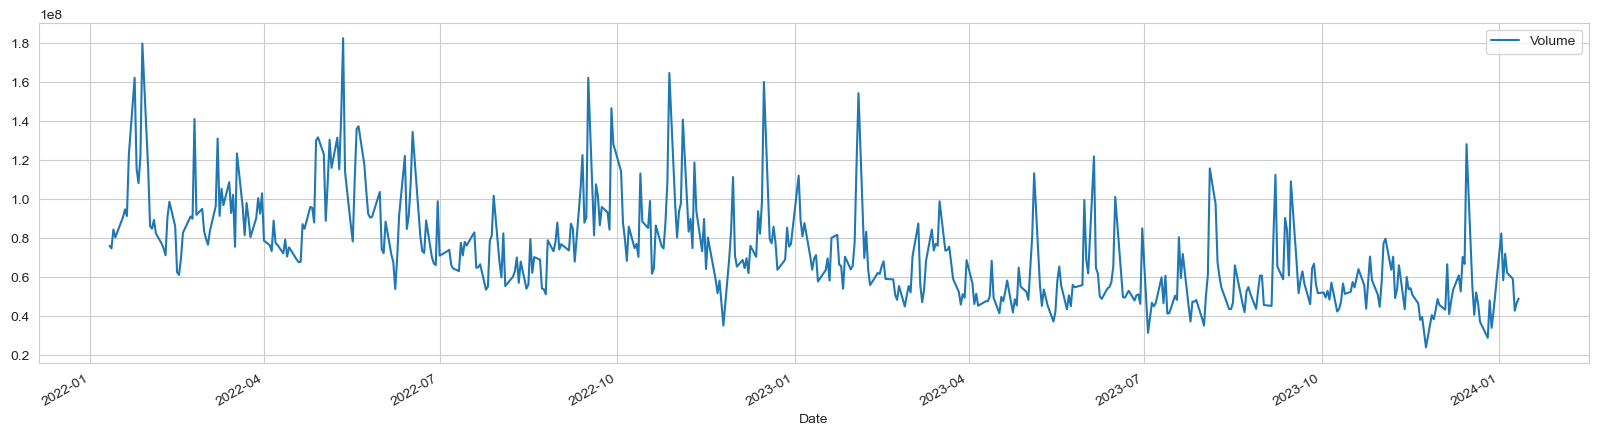

In [202]:
#AAPL volume
AAPL['Volume'].plot(legend = True, figsize = (20,5))

In [203]:
#calculating moving averages
averages = [10,25,50]
for avg in averages:
    label = 'MAvg for %s days' %(str(avg))
    AAPL[label] = AAPL['Adj Close'].rolling(window = avg, center = False).mean()

In [204]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Date,,,,,,,,,
2024-01-05,181.990005,182.759995,180.169998,181.179993,181.179993,62303300,189.356999,192.364001,187.342493
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500,188.445000,192.188401,187.636195
2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800,187.598999,191.944401,188.005586
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,186.912999,191.814801,188.369413
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49072200,186.156999,191.501601,188.679894


<Axes: xlabel='Date'>

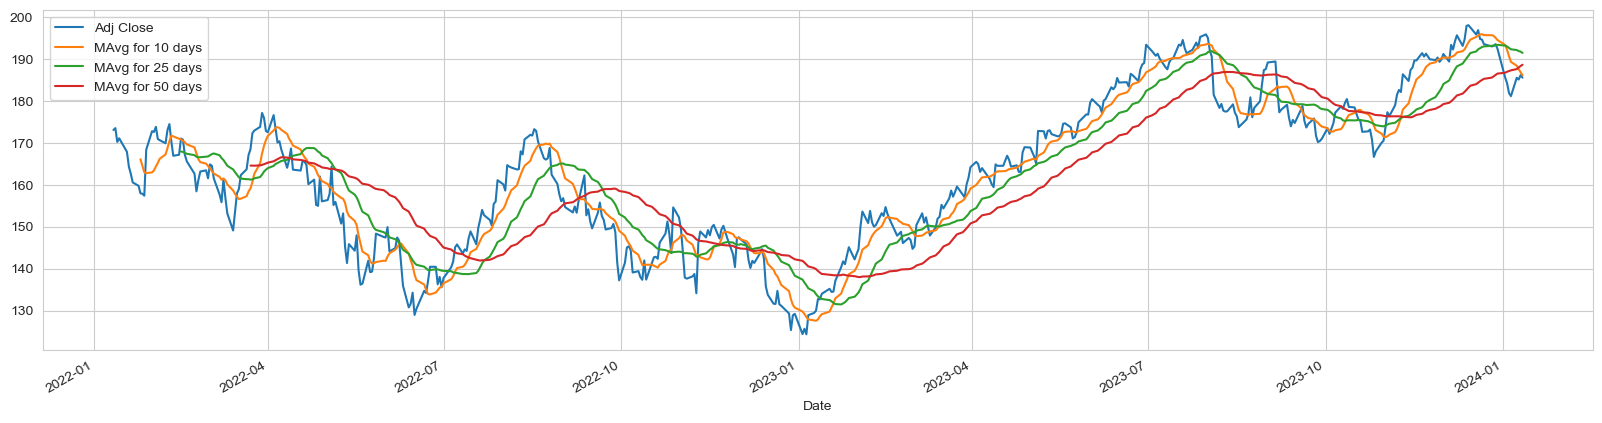

In [205]:
AAPL[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (20,5))

In [206]:
#daily return averages; can be created using the percentage change over the adj closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Date,,,,,,,,,,
2024-01-05,181.990005,182.759995,180.169998,181.179993,181.179993,62303300,189.356999,192.364001,187.342493,-0.004013
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500,188.445000,192.188401,187.636195,0.024175
2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800,187.598999,191.944401,188.005586,-0.002263
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,186.912999,191.814801,188.369413,0.005671
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49072200,186.156999,191.501601,188.679894,-0.003223


<Axes: xlabel='Date'>

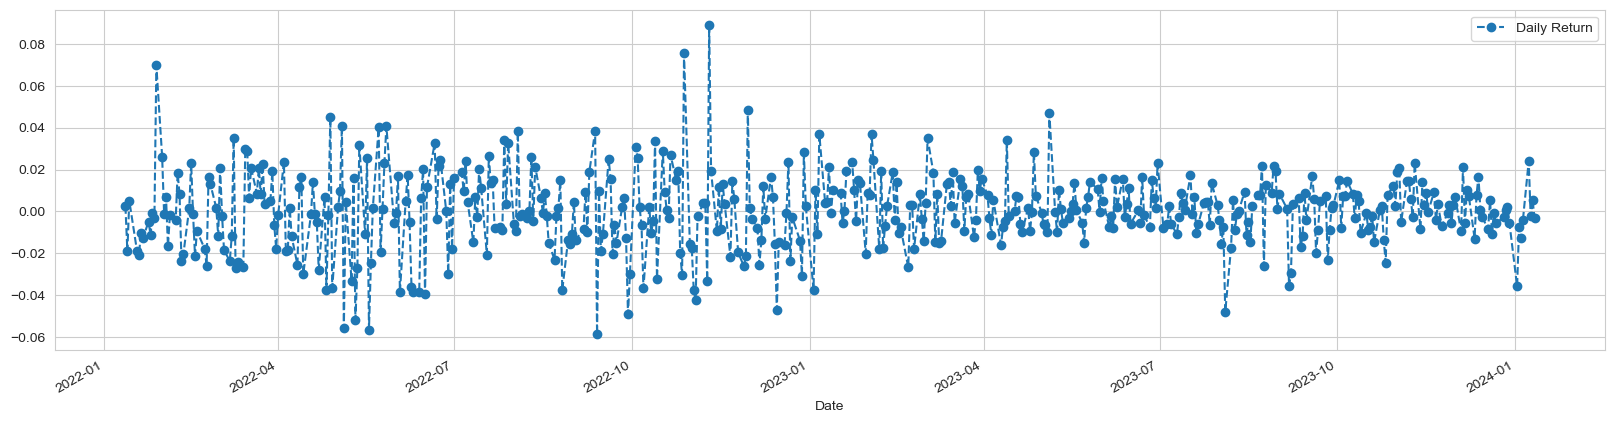

In [207]:
AAPL['Daily Return'].plot(figsize=(20,5), legend = True, linestyle = '--', marker = 'o')

/var/folders/f_/sgq7t0yd24n0f20rdrrw83dw0000gn/T/ipykernel_21428/1533359581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color= 'red')
/Users/connorshen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Density'>

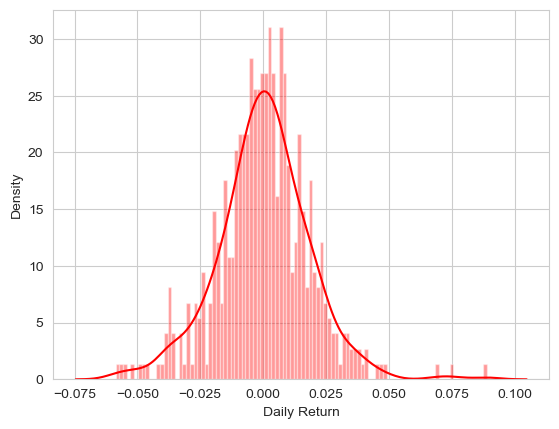

In [208]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color= 'red')

In [209]:
#correlation between different daily stock returns
close_compr = yf.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%%**********************]  7 of 7 completed


,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2024-01-05,-0.004013,0.004634,-0.004709,0.013915,-0.000516,0.022897,-0.001849
2024-01-08,0.024175,0.026577,0.022855,0.019065,0.018872,0.064281,0.012464
2024-01-09,-0.002263,0.015225,0.014445,-0.003429,0.002936,0.016975,-0.022832
2024-01-10,0.005671,0.015591,0.008698,0.036483,0.018574,0.022770,-0.004341
2024-01-11,-0.003223,0.009432,-0.000904,-0.002159,0.004859,0.008684,-0.028725


/Users/connorshen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/connorshen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


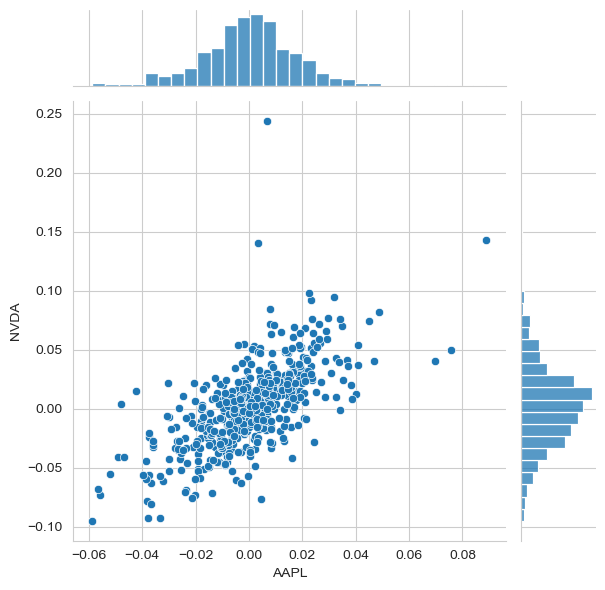

In [210]:
sns.jointplot(x = 'AAPL',y = 'NVDA', data = rets_compr, kind = 'scatter')

/Users/connorshen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/connorshen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/connorshen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/connorshen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

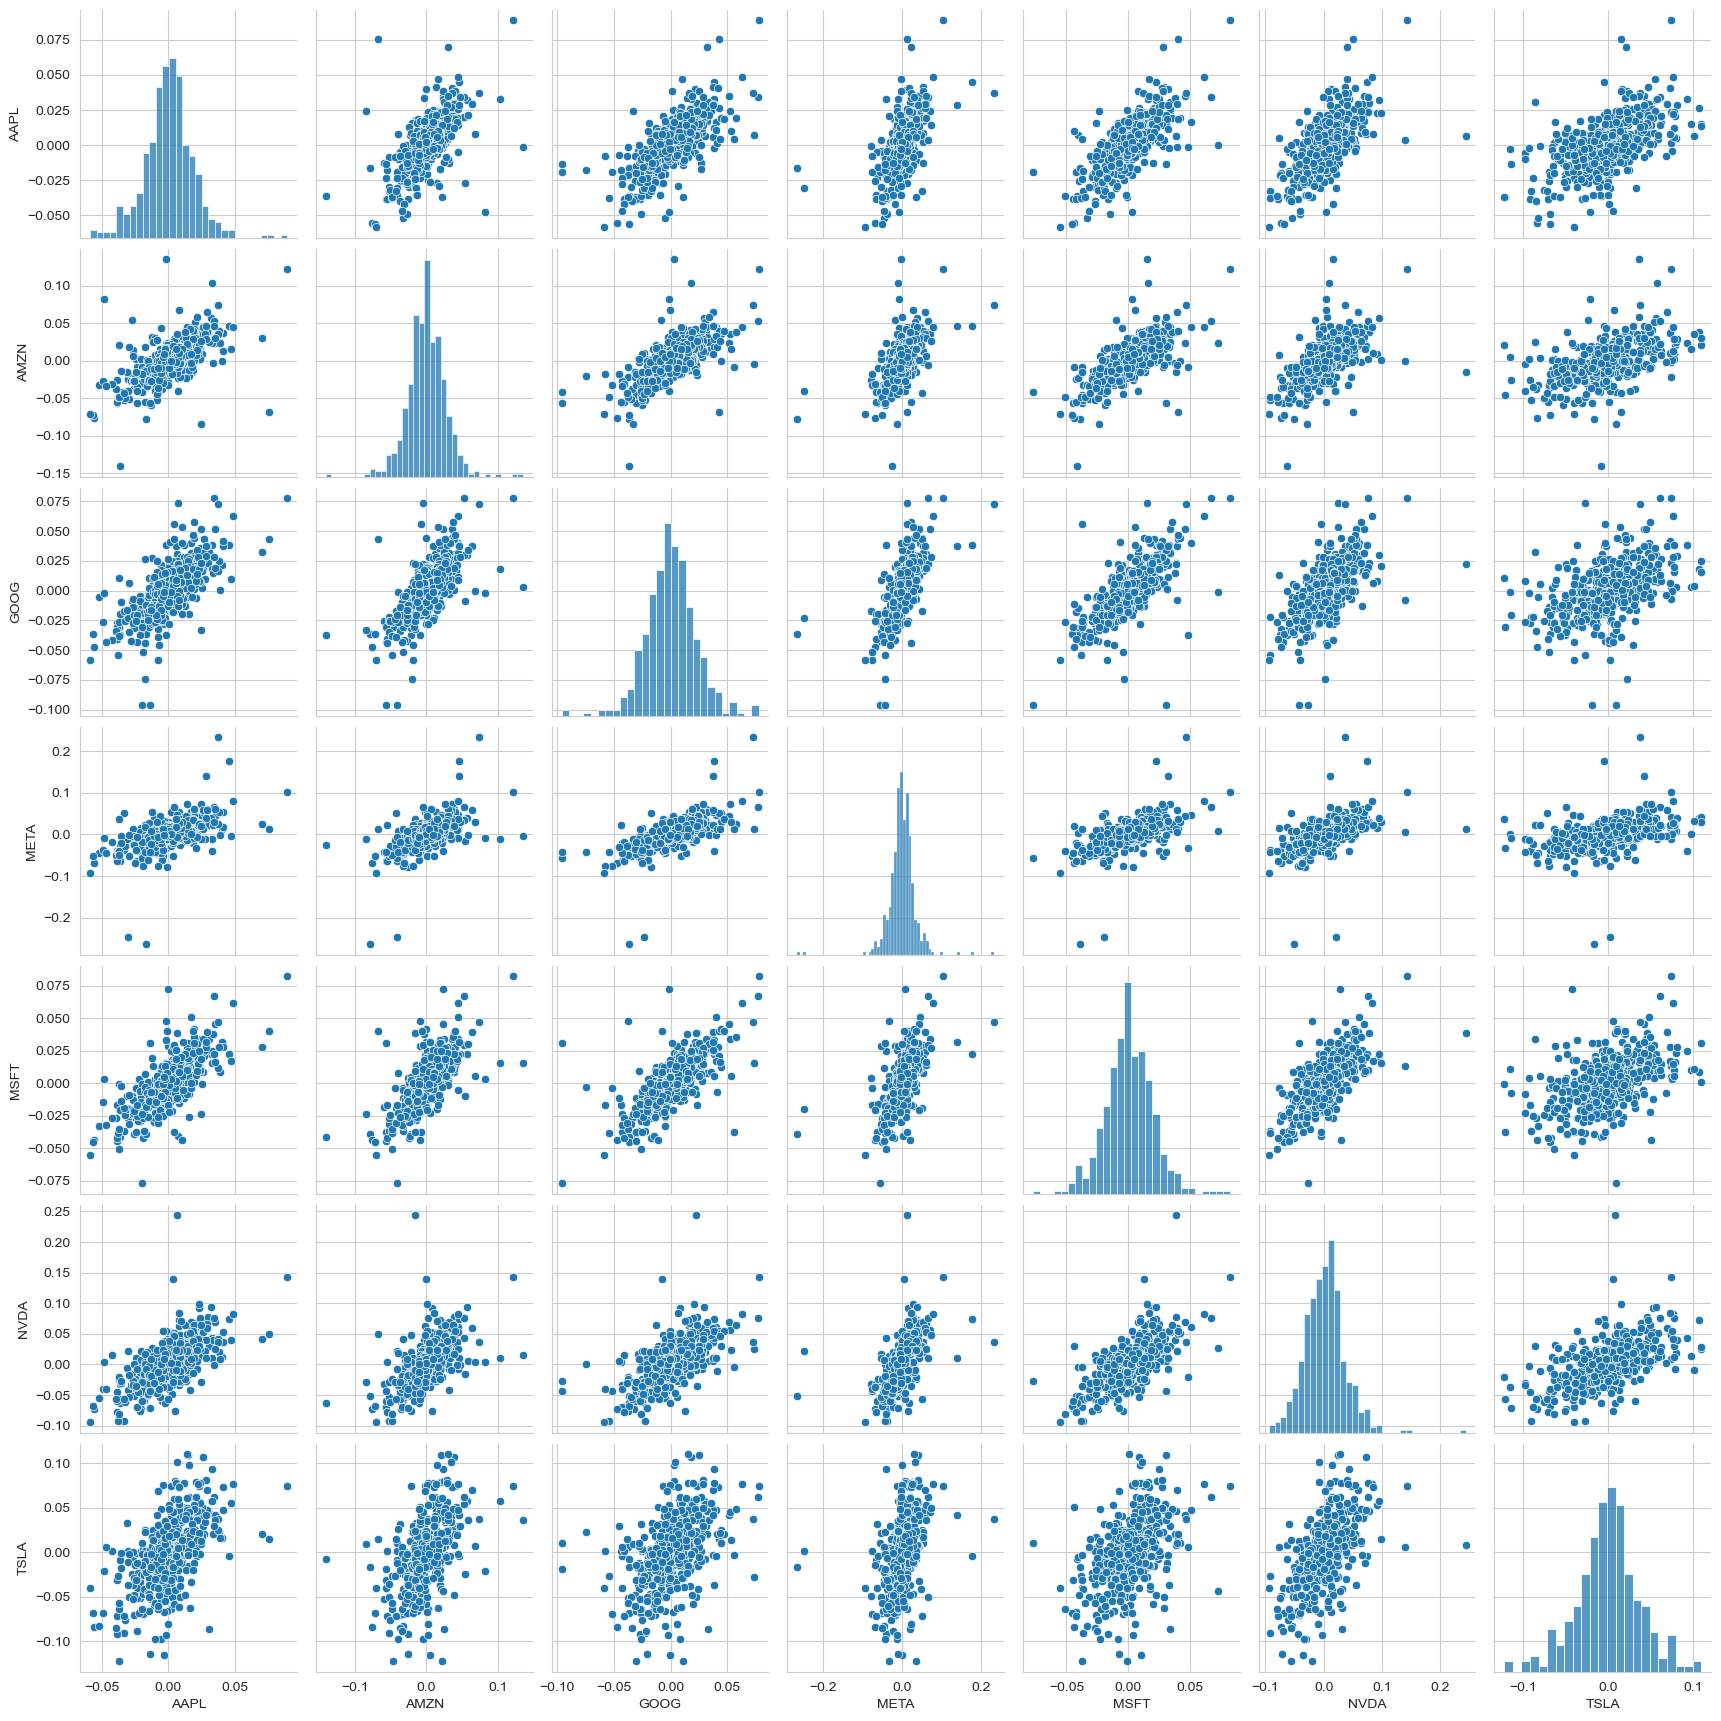

In [211]:
sns.pairplot(rets_compr.dropna())

In [212]:
corr = rets_compr.corr()
print(corr)

          AAPL      AMZN      GOOG      META      MSFT      NVDA      TSLA
AAPL  1.000000  0.621280  0.699279  0.574953  0.739443  0.663774  0.573327
AMZN  0.621280  1.000000  0.687754  0.601932  0.691090  0.600607  0.504247
GOOG  0.699279  0.687754  1.000000  0.656150  0.727564  0.635545  0.463044
META  0.574953  0.601932  0.656150  1.000000  0.599608  0.544809  0.384204
MSFT  0.739443  0.691090  0.727564  0.599608  1.000000  0.701091  0.467769
NVDA  0.663774  0.600607  0.635545  0.544809  0.701091  1.000000  0.573505
TSLA  0.573327  0.504247  0.463044  0.384204  0.467769  0.573505  1.000000


In [213]:
#generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

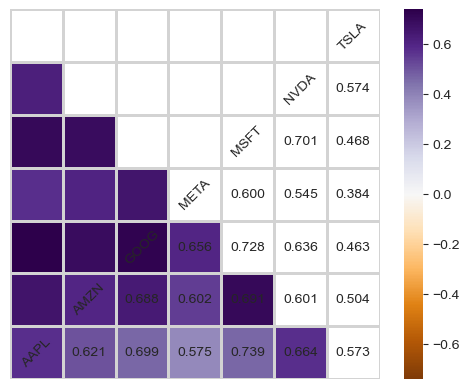

In [214]:
#set up the matplotlib figure
fig, ax = plt.subplots()

#draw up the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask = mask, cmap = plt.cm.PuOr, vmin = -vmax, vmax = vmax, square = True, linecolor = 'lightgray', linewidths = 1, ax = ax)

for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], ha = 'center', va = 'center', rotation = 45)
    for j in range(i+1, len(corr)):
        s = '{:.3f}'.format(corr.values[i,j])
        ax.text(j+0.5, len(corr)-(i+0.5), s, ha = 'center', va = 'center')

ax.axis('off')
plt.show()

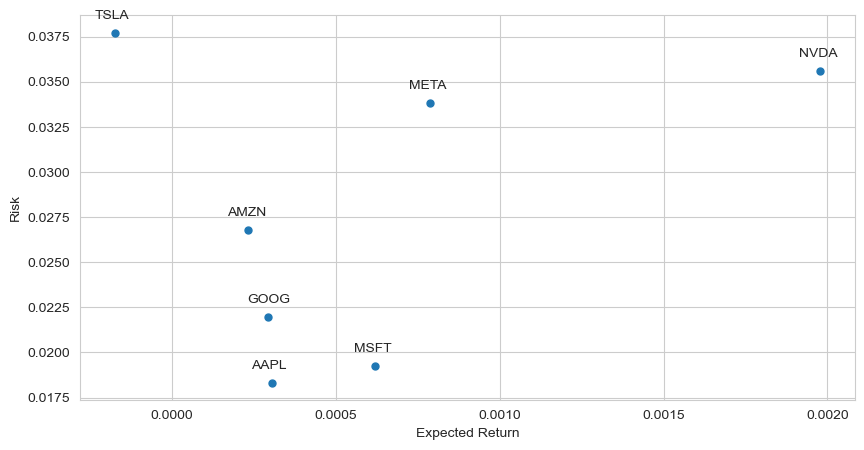

In [215]:
#determining value from risk vs expected return
rets_filled = rets_compr.dropna()
plt.figure(figsize=(10,5))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    plt.annotate(label, xy = (x,y), xytext = (-15,10), textcoords = 'offset points')

In [216]:
#assessing the value at each risk confidence interval
#tested using bootstrapping and Monte Carlo-GBM with MSFT
rets_compr.head()

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2022-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-12,0.002570,-0.000937,0.011645,-0.003320,0.010445,0.006543,0.039290
2022-01-13,-0.019028,-0.024170,-0.017769,-0.020344,-0.042323,-0.050859,-0.067491
2022-01-14,0.005111,0.005731,0.004711,0.016601,0.017717,0.013810,0.017498
2022-01-18,-0.018894,-0.019863,-0.025010,-0.041428,-0.024339,-0.038564,-0.018197


In [217]:
#95% confidence
rets_compr['MSFT'].quantile(q=0.05)

-0.029623621711261854

In [218]:
#99% confidence
rets_compr['MSFT'].quantile(q=0.01)

-0.0437412775252952

In [219]:
#predicting future risk and value of stocks by running Monte Carlo method on the GBM model
days = 365

#delta time
dt = 1/365

mu = rets_compr.mean()['MSFT']
sigma = rets_compr.std()['MSFT']

def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc= mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        
        #new price = old price + old price(shock+drift)
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    
    return price

In [220]:
#run 100 Monte Carlo simulations
MSFT.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-05,368.970001,372.059998,366.500000,367.750000,367.750000,20987000
2024-01-08,369.299988,375.200012,369.010010,374.690002,374.690002,23134000
2024-01-09,372.010010,375.989990,371.190002,375.790009,375.790009,20830000
2024-01-10,376.369995,384.170013,376.320007,382.769989,382.769989,25514200
2024-01-11,386.000000,390.679993,380.380005,384.630005,384.630005,27793500


In [221]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-11,313.380005,316.609985,309.890015,314.980011,309.313324,29386800
2022-01-12,319.670013,323.410004,317.079987,318.269989,312.544159,34372200
2022-01-13,320.470001,320.880005,304.000000,304.799988,299.316467,45366000
2022-01-14,304.250000,310.820007,303.750000,310.200012,304.619385,39846400
2022-01-18,304.070007,309.799988,301.739990,302.649994,297.205139,42333200


Text(0.5, 1.0, 'Monte Carlo Analysis for MSFT')

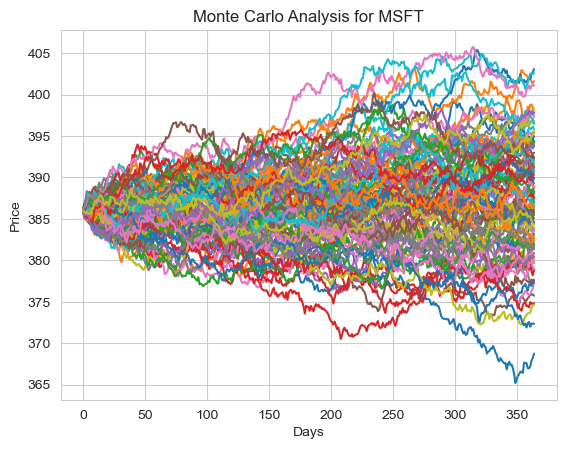

In [222]:
start_price = 386.00

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for MSFT')

Text(0.5, 1.0, 'Final price distribution for MSFT Stock after 365 days')

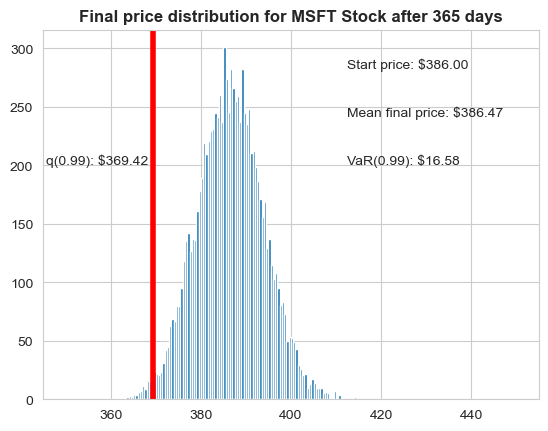

In [223]:
runs = 10000
simulations = np.zeros(runs)

for run in range(1, runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations, bins = 200, range = [350, 450])
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)
plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))
plt.figtext(0.13,0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for MSFT Stock after %s days" %days, weight='bold')